# **データマイニングと情報可視化: レポート**
# **Data mining and information visualization: Assignment**
<font size="4">
第4回　2023年12月26日(火)<br>
データマイニング手法2-1：クラスター分析（講義と分析手法の基礎）<br>
Method 2-1: Clustering analysis (Lecture and basic skills)<br>
</font>
<span style="color: red;font-weight:bold; font-size:15pt;" >締め切り 2023年12月29日(金)　23：59 JST</span>

## (0) 名前と学籍番号を表示してください。/ Please display your name and student ID.

In [409]:
# print 関数を使って下さい / Use print function.
print('一瀬遥希')
print('1TE22028G')

一瀬遥希
1TE22028G


## (1) Marketing
(1)マスマーケティングとone-to-oneマーケティングの違いを説明してください。<br>
Please explain on the difference between Mass-marketing and one-to-one marketing.<br>
(2)それぞれどのような場合に有効な広告手法か、説明してください。<br>
Please explain when each is an effective advertising method.<br>
<br>

(1)対象を特定せず、すべての消費者を対象として行うマーケティング戦略、活動。


(2)一人一人の消費者のニーズや購買履歴に合わせて、個別に展開されるマーケティング戦略、活動。



## (2) 必要なライブラリをインポートしてください。 / Import libraries.

In [410]:
# まずはライブラリをインポート / Import the libraries.
import numpy as np
from numpy.random import normal,rand

import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

## (3) CSVファイル'w4_rep_data.csv'を読み込んで、最初の10行を表示してください。
Load a csv file, w4_rep_data.csv, then display the first 10 rows of the DataFrame, df.


In [411]:
df = pd.read_csv('data/w4_rep_data.csv')

## (4) CSVファイルから読み込んだDataFrameの列と行の数を表示してください。
Please show the numbers of rows and columns in the DataFrame.

In [412]:
# The number of columns
print("行:",df.shape[0])

# The number of rows
print("列:",df.shape[1])

行: 45
列: 7


## (5) 'Name'の列を削除してください。/ Remove the column, named 'Name'.
[Remove columns: drop](https://note.nkmk.me/python-pandas-drop/)<br>
[Week 2: drop](Ex_Week2.ipynb#drop): Delete columns / rows

In [413]:
df.drop(columns='Name', inplace=True)

## (6) 欠損値の数を数える / Count the number of NaN
列のすべての要素が欠損値である列はどれですか？

[Week 4: Count NaN](Ex_Week4.ipynb#countnan)

In [414]:
# 列ごとに欠損値の数を数える / Count the number of NaN by column
print(df.isnull().sum())

Math           7
Phys           8
Chemistry      6
History       45
Literature     4
Politics       3
dtype: int64


In [415]:
# 列のすべての要素が欠損値である列はどれですか？ / Which columns have all elements of the columns missing values?
print(df.isnull().all())

Math          False
Phys          False
Chemistry     False
History        True
Literature    False
Politics      False
dtype: bool


## (7) 列を削除 / Delete a column
(6)ですべての要素が欠損値だった列を削除して、別の名前のDataFrameに格納してください。<br>
最初の5行を表示して、処理がうまくいっているか確認してください。<br>
Delete the columns where all elements were missing values in (6) and store them in a DataFrame with a different name.<br>
Display the first five rows to verify that the process is working.<br>
<br>
[Week 4: Count NaN](Ex_Week4.ipynb#drop_column)<br>
[Week 4: Remove specific columns or rows](Ex_Week4.ipynb#removenan_subset)

In [416]:
df2=df.drop(columns='History')
df2.head()

,Math,Phys,Chemistry,Literature,Politics
0,76.0,91.0,70.0,50.0,32.0
1,69.0,82.0,78.0,35.0,45.0
2,72.0,83.0,76.0,43.0,39.0
3,81.0,NaN,72.0,47.0,31.0
4,80.0,83.0,69.0,43.0,38.0


## (8) 特定の列における欠損値の削除 / Remove NaN in a specific column
(7)で得られたDataFrameに対して、'Phys'の列に欠損値がある行を削除して、別名のDataFrameに格納してください。<br>
最初の5行を表示して、(7)で得られたDataFrameと見比べて、'Phys'の欠損値があった3行目が新しいDataFrameでなくなっているのを確認してください。<br>

In the DataFrame obtained in (7), remove the rows which have NaN in the 'Phys' column and store them in a DataFrame with a different name.<br>
Display the first 5 rows, then verify that the third row which had NaN in 'Phys' column was removed.<br>
Please verify that 

[Week 4: Remove NaN in a specific rows](Ex_Week4.ipynb#removenan_subset)

In [417]:
df3 = df2.dropna(subset=['Phys'])
df3.head()

,Math,Phys,Chemistry,Literature,Politics
0,76.0,91.0,70.0,50.0,32.0
1,69.0,82.0,78.0,35.0,45.0
2,72.0,83.0,76.0,43.0,39.0
4,80.0,83.0,69.0,43.0,38.0
5,80.0,83.0,42.0,39.0,35.0


## (9) 欠損値の削除 / Remove NaN
(7)で得られたDataFrameに対して、一つでも欠損値のある行を削除して、別名のDataFrameに格納してください。<br>
欠損値の数がゼロになっているのを確認してください。<br>

In the DataFrame obtained in (7), remove the rows which have at least one NaN, then store them in a DataFrame with a different name.<br>
Please verify that the number of NaN is zero.<br>

[Week 4: Remove NaN](Ex_Week4.ipynb#removenan)

In [418]:
df4 = df2.dropna(how='any')
print(df4.isnull().sum(axis=0))

Math          0
Phys          0
Chemistry     0
Literature    0
Politics      0
dtype: int64


## (10) 平均を求める / Calculate averages.
`Chemistry`と`Literature`の平均を求めて、表示してください。<br>
Calculate the averages of `Chemistry` and `Literature`, then display the results.<br>
<br>
<b>(9)でNaNを削除したデータを別名で格納してあるので、そのDataFrameを使いましょう。<br>
To calculate the averages, use a new DataFrame which stores the data without NaN as you did in  (8).</b><br>
<br>
[Week 4: Average](Ex_Week4.ipynb#average)

In [419]:
# average of Chemistry, mu_Chemistry
mu_Chemistry = df4['Chemistry'].mean()
print(mu_Chemistry)

# average of Literature, mu_Literature
mu_Literature = df4['Literature'].mean()
print(mu_Literature)


45.19230769230769
76.42307692307692


## (11) 標準偏差を求める / Calculate standard deviations (std).
`Chemistry`と`Literature`の標準偏差を求めて、表示してください。<br>
Calculate the standard deviations of `Chemistry` and `Literature`, then display the results.<br>
<br>
<b>(9)でNaNを削除したデータを別名で格納してあるので、そのDataFrameを使いましょう。<br>
To calculate the averages, use a new DataFrame which stores the data without NaN as you did in  (8).</b><br>
<br>
[Week 4: Standard deviation](Ex_Week4.ipynb#std)

In [420]:
# std of Chemistry, std_Chemistry
std_Chemistry = df4['Chemistry'].std()
print(std_Chemistry)

# std of Literature, std_Literature
std_Literature = df4['Literature'].std()
print(std_Literature)


13.49079458228975
21.782879657057425


## (12) データの標準化
上で求めた平均と標準偏差で、`Chemistry`と`Literature`を標準化してください。<br>
標準化したデータは、別名の配列(DataFrame/リスト)に格納してください。<br><br>
Standardize the data, `Chemistry` and `Literature`, with the averages and standard deviations obtained above. <br>
Then, store them in a DataFrame or a list with a different name.<br>

<b>(9)でNaNを削除したデータを別名で格納してあるので、そのDataFrameを使いましょう。<br>
To calculate the averages, use a new DataFrame which stores the data without NaN as you did in  (8).</b><br>

[Week 4: Standardization](Ex_Week4.ipynb#standardization)

In [421]:
Chemistry_standardized = (df4['Chemistry'] - mu_Chemistry) / std_Chemistry
df_Chemistry_standardized = pd.DataFrame(Chemistry_standardized)
df_Chemistry_standardized.head()

,Chemistry
0,1.838861
1,2.431858
2,2.283608
4,1.764736
5,-0.236629


In [422]:
Literature_standardized = (df4['Literature'] - mu_Literature) / std_Literature
df_Literature_standardized = pd.DataFrame(Literature_standardized)
df_Literature_standardized.head()

,Literature
0,-1.213020
1,-1.901635
2,-1.534374
4,-1.534374
5,-1.718004


## (13) 可視化 / Visualization
標準化する前の`Chemistry`と`Literature`のデータと、標準化したあとのデータを散布図でプロットしてください。<br>

標準化する前のグラフのプロット範囲は、<br>
0 < x < 100, <br>
0 < y < 100, <br>
標準化した後のグラフのプロット範囲は、<br>
-5 < x < 5, <br>
-5 < y < 5. <br>
とし、x軸とy軸の比率が等しい正方形の図を作成してください。<br><br>

Plot the data of `Chemistry` and `Literature` before and after the standardization with a scattering plot.<br>
The range of the axes before standardization are<br>
0 < x < 100, <br>
0 < y < 100, <br>
and after the standardization are<br>
-5 < x < 5, <br>
-5 < y < 5. <br>
Then draw a square figure with equal axis ratios.<br><br> 
[Week 4: Scattering plot](Ex_Week4.ipynb#scatterplot)

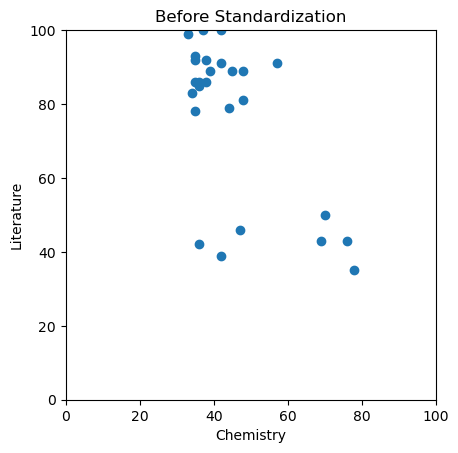

In [423]:
# Before Standardization, Chemistry vs. Literature
plt.scatter(df4['Chemistry'], df4['Literature'])
plt.title('Before Standardization')
plt.xlabel('Chemistry')
plt.ylabel('Literature')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

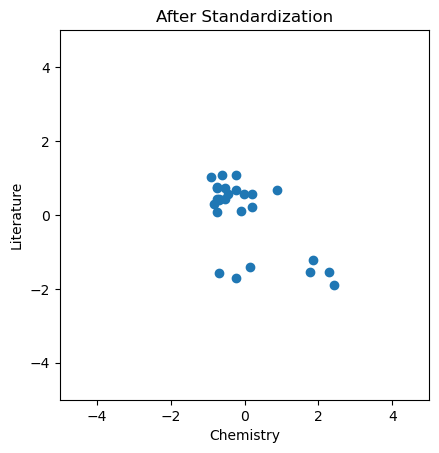

In [424]:
# After Standardization, Chemistry vs. Literature
plt.scatter(df_Chemistry_standardized['Chemistry'], df_Literature_standardized['Literature'])
plt.title('After Standardization')
plt.xlabel('Chemistry')
plt.ylabel('Literature')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## (14) クラスタリング分析について / Clustering Analysis
以下のいずれかについて自分で調べて、手短にまとめてください。 / Please summarize briefly one of the topics below.
* クラスタリング分析が役に立つ例を1つ <br>
One example of application of clustering analysis.
* 階層型と非階層型のクラスタリング分析について、それぞれの長所と短所<br>
Advantages and disadvantages of Hierarchical and Non-hierarchical clustering analysis.

・クラスタリング分析が役立つ例<br>
市場セグメンテーション: 類似した購買行動を示す顧客を同じクラスタにグループ化して、適切なマーケティング戦略を展開する<br>
画像セグメンテーション: 画像内の類似した領域を同じクラスタに分類して、物体や特定の構造を検出しやすくする<br>
文書クラスタリング: 似たようなトピックを持つ文書を同じクラスタにグループ化して、情報検索やテキストマイニングを改善する


・階層型<br>
長所：<br>
クラスタ数を自由に設定できる<br>
分析結果が、デンドログラムで表現されるため、視覚的にも理解がしやすい<br>
短所：<br>
データ全てを総当たりで計算するため、計算量が大きい<br>

・非階層型<br>
長所：<br>
階層型クラスター分析よりも計算が簡略化され、効率的<br>
短所：<br>
基準値やクラスター数を人の手で設定する必要があり、最適なクラスタ数を決定するのが難しい

## おまけ問題 / Optional problem
(12)の問題で用いたデータ(Chemistry & Literature)を、Scikit-learnで、標準化してみてください。<br>
グラフにプロットして、元のデータと比べてみましょう。<br>
Please standardize data (Chemistry & Literature) with Scikit-learn.<br>
Plot the standardize data and the original data with scattering plot.<br>

In [425]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_standardized = scaler.fit_transform(df4[['Chemistry','Literature']])
df_x_standardized = pd.DataFrame(x_standardized, columns=['Chemistry','Literature'])

df_x_standardized.head()

,Chemistry,Literature
0,1.875277,-1.237043
1,2.480018,-1.939294
2,2.328833,-1.564760
3,1.799685,-1.564760
4,-0.241315,-1.752027


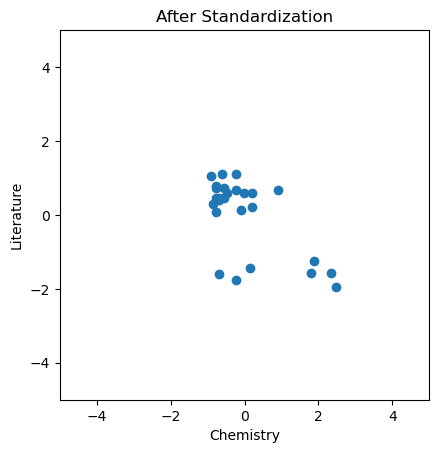

In [426]:
plt.scatter(df_x_standardized['Chemistry'], df_x_standardized['Literature'])
plt.title('After Standardization')
plt.xlabel('Chemistry')
plt.ylabel('Literature')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()